In [2]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_array
from scipy.sparse.csgraph import dijkstra
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from functions import static_assignment_fw
from functions import *
from plot import plot_network

## Initialisation

(31500.0, 500000.0)
(31500.0, 500000.0)
(31500.0, 500000.0)


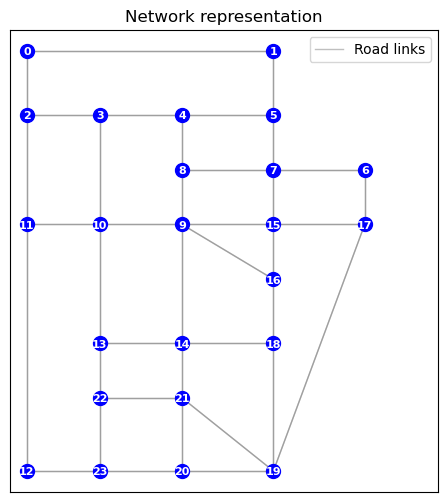

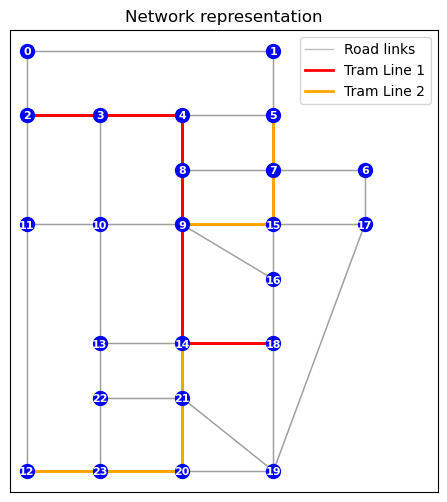

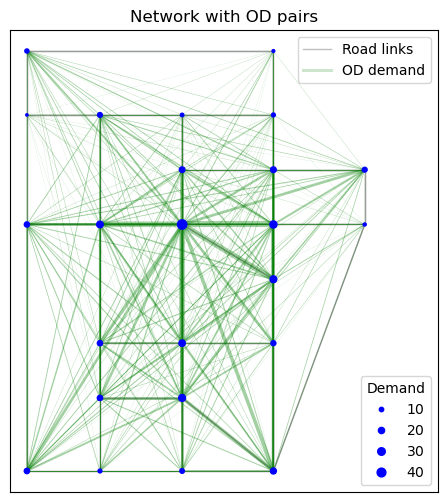

In [37]:
# load network
df_od = pd.read_csv('sf/sf_od.csv')
df_node = pd.read_csv('sf/sf_node.csv')
df_link = pd.read_csv('sf/sf_link.csv')
df_link_tram = pd.read_csv('sf/sf_link_tram.csv').drop_duplicates(["start_node", "end_node"], ignore_index=True) #We can't have duplicates

plot_network(df_node, df_link)
plt.savefig("Latex/Figures/network.pgf", bbox_inches = "tight")
plot_network(df_node, df_link, df_link_tram)
plt.savefig("Latex/Figures/network_tram.pgf", bbox_inches = "tight")
plot_network(df_node, df_link, df_od=df_od)
plt.savefig("Latex/Figures/od_pairs.pgf", bbox_inches = "tight")

In [38]:
# define cost function
def BPR_cost_function(df_link, x):
    return df_link.t0 * (1 + 0.15 * ((x/df_link.saturation)**4))

# define objective function
def Beckmann_obj_function(df_link, x):
    return (df_link.t0 * x * (1 + 0.03 * (x / df_link.saturation)**4)).sum()

distances: https://maps.app.goo.gl/8aV33hSoMT5dqdGJ6 (line 2)
https://maps.app.goo.gl/vfXk5ZgF1G3eepJu7 (line 1)

In [ ]:
df_link_tram = pd.read_csv('sf/sf_link_tram.csv')
df_link_tram["time"] = df_link_tram["distance"] / 25 * 60# 25 miles/hour
df_link_tram["cost"] = df_link_tram["time"] / 60 #t_0 is in hours
df_link_tram.to_csv('sf/sf_link_tram.csv', index=False)


## Base scenario

In [39]:
# first run with recommended parameters
max_iter, max_gap, max_gap_ls = 2000, 1e-4, 1e-2
x_star0, _, gap, obj = static_assignment_fw(df_od, df_link, df_link_tram, max_iter, max_gap, cost_function=BPR_cost_function, objective_function=Beckmann_obj_function)

print(f"Stopped after {len(gap)}/{max_iter} iterations, final gap : {gap[-1]}/{max_gap}, final obj value : {obj[-1]}")

np.save("x_star0", x_star0)

Gap: 0.0002069 - Objective: 42.3179:  52%|█████▏    | 1048/2000 [11:31<10:28,  1.51it/s]

Stopped after 1049/2000 iterations, final gap : 9.882287363008393e-05/0.0001, final obj value : 42.317891730503035


In [40]:
x_star0 = np.load("x_star0.npy")

(31500.0, 500000.0)


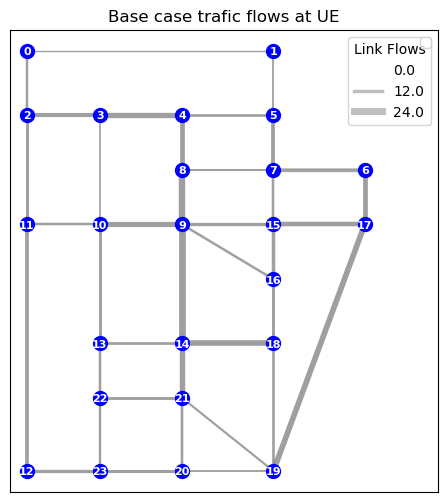

In [41]:
plot_network(df_node, df_link, link_flows=x_star0, title="Base case trafic flows at UE")

plt.savefig("Latex/Figures/basecase.pgf", bbox_inches="tight")

## Light rail scenario

In [42]:
# run with tram (level=1)
max_iter, max_gap, max_gap_ls = 2000, 1e-4, 1e-2
x_star1, x_tram1, gap, obj = static_assignment_fw(df_od, df_link, df_link_tram, max_iter, max_gap, cost_function=BPR_cost_function, objective_function=Beckmann_obj_function, restriction_level=1)

print(f"Stopped after {len(gap)}/{max_iter} iterations, final gap : {gap[-1]}/{max_gap}, final obj value : {obj[-1]}")

np.save("x_star1", x_star1)
np.save("x_tram1", x_tram1)

Gap: 0.0001179 - Objective: 26.2859:   6%|▌         | 118/2000 [01:35<25:23,  1.23it/s]

Stopped after 119/2000 iterations, final gap : 9.484739884477122e-05/0.0001, final obj value : 26.286778112546862


In [43]:
x_star1 = np.load("x_star1.npy")
x_tram1 = np.load("x_tram1.npy")

(31500.0, 500000.0)


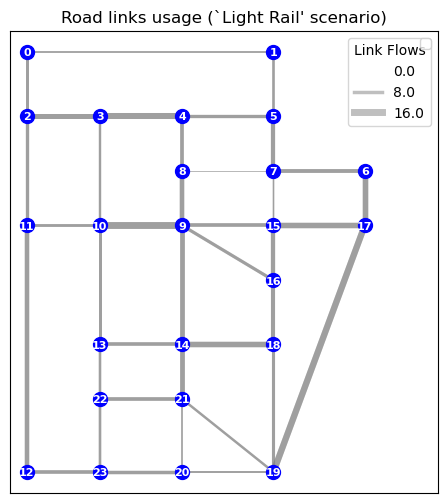

In [44]:
plot_network(df_node, df_link, link_flows=x_star1, title="Road links usage (`Light Rail' scenario)")
plt.savefig("Latex/Figures/lightrail_road.pgf", bbox_inches = "tight")

(31500.0, 500000.0)


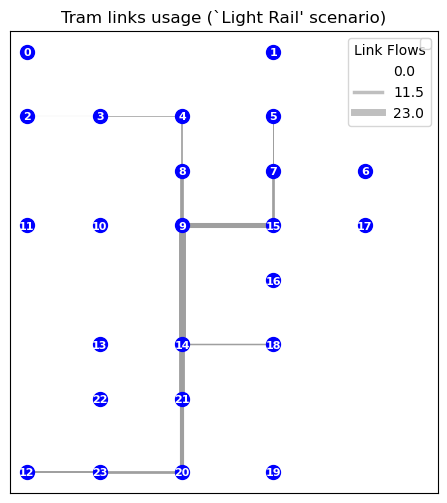

In [45]:
plot_network(df_node, df_link_tram, link_flows=x_tram1, title="Tram links usage (`Light Rail' scenario)")
plt.savefig("Latex/Figures/lightrail_tram.pgf", bbox_inches = "tight")

(31500.0, 500000.0)


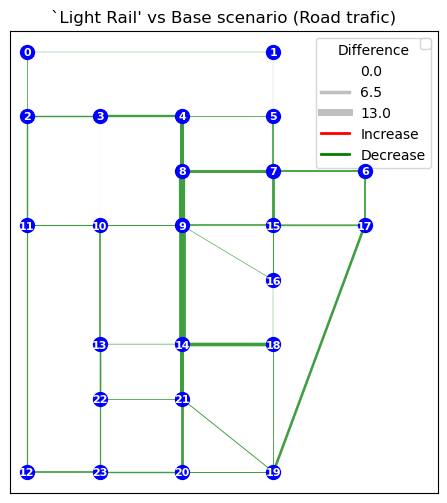

In [62]:
plot_network(df_node, df_link, link_flows=x_star1-x_star0, title="`Light Rail' vs Base scenario (Road trafic)")
plt.savefig("Latex/Figures/lightrail_diff.pgf", bbox_inches = "tight")

## P&R scenario

In [47]:
# run with tram (level=2)
max_iter, max_gap, max_gap_ls = 2000, 1e-4, 1e-2
x_star2, x_tram2, gap, obj = static_assignment_fw(df_od, df_link, df_link_tram, max_iter, max_gap, cost_function=BPR_cost_function, objective_function=Beckmann_obj_function, restriction_level=2)

print(f"Stopped after {len(gap)}/{max_iter} iterations, final gap : {gap[-1]}/{max_gap}, final obj value : {obj[-1]}")

np.save("x_star2", x_star2)
np.save("x_tram2", x_tram2)

Gap: 0.0001318 - Objective: 20.1182:  15%|█▍        | 292/2000 [09:50<57:33,  2.02s/it]  

Stopped after 293/2000 iterations, final gap : 9.688901731698269e-05/0.0001, final obj value : 20.120828672760908


In [48]:
x_star2 = np.load("x_star2.npy")
x_tram2 = np.load("x_tram2.npy")

(31500.0, 500000.0)


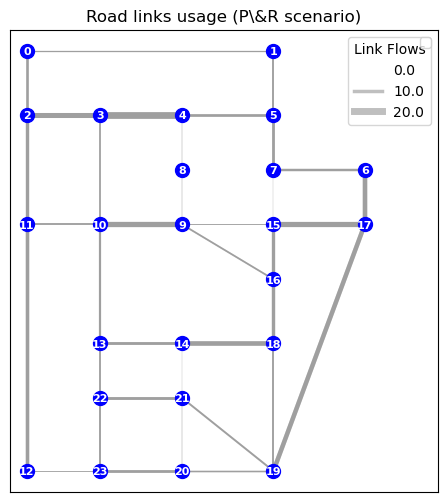

In [67]:
plot_network(df_node, df_link, link_flows=x_star2, title="Road links usage (P\\&R scenario)")
plt.savefig("Latex/Figures/PnR_road.pgf", bbox_inches = "tight")

(31500.0, 500000.0)


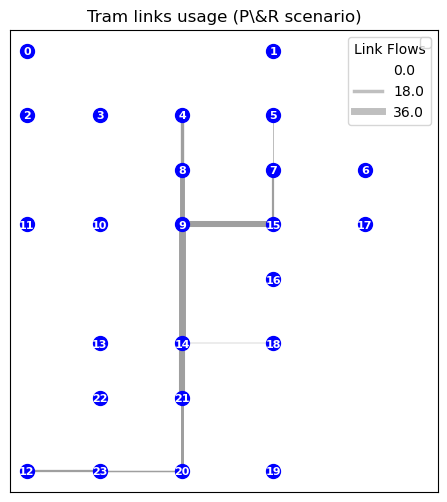

In [66]:
plot_network(df_node, df_link_tram, link_flows=x_tram2, title="Tram links usage (P\\&R scenario)")
plt.savefig("Latex/Figures/PnR_tram.pgf", bbox_inches = "tight")

(31500.0, 500000.0)


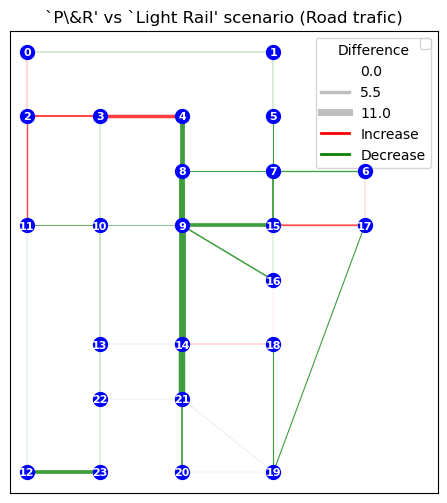

In [68]:
plot_network(df_node, df_link, link_flows=x_star2-x_star1, title="`P\\&R' vs `Light Rail' scenario (Road trafic)")
plt.savefig("Latex/Figures/PnR_diff_road.pgf", bbox_inches = "tight")

(31500.0, 500000.0)


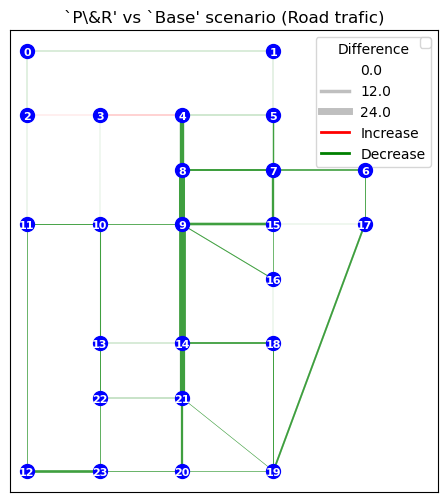

In [69]:
plot_network(df_node, df_link, link_flows=x_star2-x_star0, title="`P\\&R' vs `Base' scenario (Road trafic)")
plt.savefig("Latex/Figures/PnR_diff_base_road.pgf", bbox_inches = "tight")

(31500.0, 500000.0)


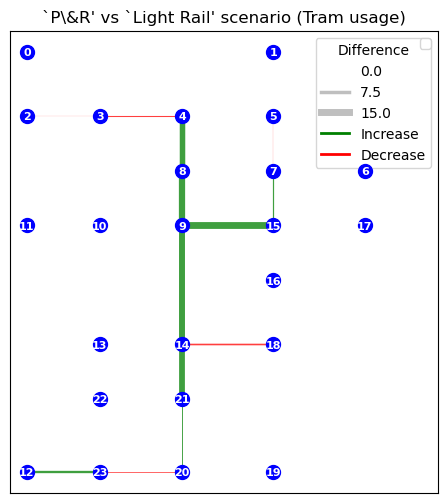

In [70]:
plot_network(df_node, df_link_tram, link_flows=x_tram2-x_tram1, title="`P\\&R' vs `Light Rail' scenario (Tram usage)", reverse_colors=True)
plt.savefig("Latex/Figures/PnR_diff_tram.pgf", bbox_inches = "tight")

## Total travel times

In [71]:
t_0 = BPR_cost_function(df_link, x_star0)
t_1 = BPR_cost_function(df_link, x_star1)
t_2 = BPR_cost_function(df_link, x_star2)

In [75]:
TT_0 = np.dot(t_0, x_star0) 
TT_1 = np.dot(t_1, x_star1) + np.dot(df_link_tram["cost"],x_tram1)
TT_2 = np.dot(t_2, x_star2) + np.dot(df_link_tram["cost"],x_tram2)

TT_0, TT_1, TT_2, TT_1/TT_0, TT_2/TT_0

(74.79897539010143,
 43.54407385523548,
 38.064866067782496,
 0.582147999062002,
 0.5088955546417797)

In [78]:
df_link

,link_id,start_node,end_node,saturation,length,max_speed,t0
0,0,0,1,25.90020,1.50,25,0.06
1,1,0,2,23.40347,1.00,25,0.04
2,2,1,0,25.90020,1.50,25,0.06
3,3,1,5,4.95818,1.25,25,0.05
4,4,2,0,23.40347,1.00,25,0.04
...,...,...,...,...,...,...,...
71,71,22,21,5.00000,1.00,25,0.04
72,72,22,23,5.07851,0.50,25,0.02
73,73,23,12,5.09126,1.00,25,0.04
74,74,23,20,4.88536,0.75,25,0.03


In [80]:
road_use_0 = x_star0.sum()
road_use_1 = x_star1.sum()
road_use_2 = x_star2.sum()


road_use_0, road_use_1, road_use_2

(877.76560126847, 631.5709007314481, 517.0791757381143)

## Output tables for latex

In [58]:
df_link_tram = pd.read_csv('sf/sf_link_tram.csv').drop_duplicates(["start_node", "end_node"], ignore_index=True) #We can't have duplicates
print(df_link_tram.style.format({"line" : "Line {0}", "distance": "{:.1f}", "time": "{:.2f}", "cost": "{:.3f}"}).hide().to_latex())

\begin{tabular}{rrrrrr}
start_node & end_node & line & distance & time & cost \\
2 & 3 & Line 1 & 1.6 & 3.84 & 0.064 \\
3 & 2 & Line 1 & 1.6 & 3.84 & 0.064 \\
3 & 4 & Line 1 & 1.5 & 3.60 & 0.060 \\
4 & 3 & Line 1 & 1.5 & 3.60 & 0.060 \\
4 & 8 & Line 1 & 0.9 & 2.16 & 0.036 \\
8 & 4 & Line 1 & 0.9 & 2.16 & 0.036 \\
8 & 9 & Line 1 & 0.4 & 0.96 & 0.016 \\
9 & 8 & Line 1 & 0.4 & 0.96 & 0.016 \\
9 & 14 & Line 1 & 1.1 & 2.64 & 0.044 \\
14 & 9 & Line 1 & 1.1 & 2.64 & 0.044 \\
14 & 18 & Line 1 & 1.0 & 2.40 & 0.040 \\
18 & 14 & Line 1 & 1.0 & 2.40 & 0.040 \\
12 & 23 & Line 2 & 1.0 & 2.40 & 0.040 \\
23 & 12 & Line 2 & 1.0 & 2.40 & 0.040 \\
23 & 20 & Line 2 & 1.5 & 3.60 & 0.060 \\
20 & 23 & Line 2 & 1.5 & 3.60 & 0.060 \\
20 & 21 & Line 2 & 0.5 & 1.20 & 0.020 \\
21 & 20 & Line 2 & 0.5 & 1.20 & 0.020 \\
21 & 14 & Line 2 & 0.5 & 1.20 & 0.020 \\
14 & 21 & Line 2 & 0.5 & 1.20 & 0.020 \\
9 & 15 & Line 2 & 1.0 & 2.40 & 0.040 \\
15 & 9 & Line 2 & 1.0 & 2.40 & 0.040 \\
15 & 7 & Line 2 & 1.1 & 2.64 & 0.044 

In [59]:
table = df_link.copy(deep=True).drop(columns = ["max_speed", "length"])
table = pd.merge(table, df_link_tram[["start_node","end_node","cost"]], left_on = ["start_node","end_node"], right_on = ["start_node","end_node"], how="left").drop_duplicates().reset_index(drop=True)
table = table.rename(columns={"link_id": "Link ID", "start_node": "Start Node", "end_node": "End Node", "saturation": "capacity", "t0": "$t_0$", "cost": "Tram Travel Time"})
table = table.set_index("Link ID")

table.columns = pd.MultiIndex.from_product([table.columns] + [[None]], names = [None, "Scenario"])
table[("Road Travel Time", "Base")] = BPR_cost_function(df_link, x_star0)
table[("Road Travel Time", "Light Rail")] = BPR_cost_function(df_link, x_star1)
table[("Road Travel Time", "P\&R")] = BPR_cost_function(df_link, x_star2)
table[("Flow", "Base")] = x_star0
table[("Flow", "Light Rail")] = x_star1
table[("Flow", "P\&R")] = x_star2
print(table.style.format({
    ("capacity", np.NaN) : "{:.1f}",
    ("$t_0$", np.NaN): "{:.2f}",
    ("Tram Travel Time", np.NaN): "{:.2f}",
    ("Road Travel Time", "Base"): "{:.2f}",
    ("Road Travel Time", "Light Rail"): "{:.2f}",
    ("Road Travel Time", "P\\&R"): "{:.2f}",
    ("Flow", "Base"): "{:.1f}",
    ("Flow", "Light Rail"): "{:.1f}",
    ("Flow", "P\\&R"): "{:.1f}",
    }, na_rep = "-")
    .format_index(axis=1, na_rep = "")
    .to_latex(hrules=True))

\begin{tabular}{lrrrrrrrrrrr}
\toprule
 & Start Node & End Node & capacity & $t_0$ & Tram Travel Time & \multicolumn{3}{r}{Road Travel Time} & \multicolumn{3}{r}{Flow} \\
Scenario &  &  &  &  &  & Base & Light Rail & P\&R & Base & Light Rail & P\&R \\
Link ID &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
0 & 0 & 1 & 25.9 & 0.06 & - & 0.06 & 0.06 & 0.06 & 4.5 & 4.0 & 3.5 \\
1 & 0 & 2 & 23.4 & 0.04 & - & 0.04 & 0.04 & 0.04 & 8.1 & 6.8 & 7.3 \\
2 & 1 & 0 & 25.9 & 0.06 & - & 0.06 & 0.06 & 0.06 & 4.5 & 4.0 & 3.5 \\
3 & 1 & 5 & 5.0 & 0.05 & - & 0.07 & 0.06 & 0.06 & 6.0 & 5.8 & 5.3 \\
4 & 2 & 0 & 23.4 & 0.04 & - & 0.04 & 0.04 & 0.04 & 8.1 & 6.8 & 7.3 \\
5 & 2 & 3 & 17.1 & 0.04 & 0.06 & 0.04 & 0.04 & 0.04 & 14.0 & 11.5 & 14.4 \\
6 & 2 & 11 & 23.4 & 0.04 & - & 0.04 & 0.04 & 0.04 & 10.0 & 7.4 & 9.5 \\
7 & 3 & 2 & 17.1 & 0.04 & 0.06 & 0.04 & 0.04 & 0.04 & 14.0 & 11.4 & 14.5 \\
8 & 3 & 4 & 17.8 & 0.02 & 0.06 & 0.02 & 0.02 & 0.02 & 18.0 & 13.8 & 19.1 \\
9 & 3 & 10 & 4.9 & 0.06 & - & 0.07 & 0.07 & 0.

In [60]:
table = df_link_tram.copy(deep=True).drop(columns = ["distance", "time"])
table = table.rename(columns={"start_node": "Start Node", "end_node": "End Node", "line": "Line", "cost": "Travel Time", })

table.columns = pd.MultiIndex.from_product([[None]] + [table.columns])
table[("Usage", "Light Rail")] = x_tram1
table[("Usage", "P\\&R")] = x_tram2
print(table.style.format({
    (np.NaN, "Travel Time"): "{:.3f}",
    ("Usage", "Light Rail"): "{:.1f}",
    ("Usage", "P\\&R"): "{:.1f}",
    }, na_rep = "-")
    .format_index(axis=1, na_rep = "")
    .hide()
    .to_latex(hrules=True))

\begin{tabular}{rrrrrr}
\toprule
\multicolumn{4}{r}{} & \multicolumn{2}{r}{Usage} \\
Start Node & End Node & Line & Travel Time & Light Rail & P\&R \\
\midrule
2 & 3 & 1 & 0.064 & 0.2 & 0.0 \\
3 & 2 & 1 & 0.064 & 0.2 & 0.0 \\
3 & 4 & 1 & 0.060 & 2.3 & 0.0 \\
4 & 3 & 1 & 0.060 & 2.3 & 0.0 \\
4 & 8 & 1 & 0.036 & 5.2 & 16.8 \\
8 & 4 & 1 & 0.036 & 5.2 & 17.0 \\
8 & 9 & 1 & 0.016 & 11.9 & 25.2 \\
9 & 8 & 1 & 0.016 & 12.0 & 25.5 \\
9 & 14 & 1 & 0.044 & 22.9 & 35.7 \\
14 & 9 & 1 & 0.044 & 22.9 & 35.8 \\
14 & 18 & 1 & 0.040 & 4.7 & 1.5 \\
18 & 14 & 1 & 0.040 & 4.7 & 1.5 \\
12 & 23 & 2 & 0.040 & 6.5 & 11.3 \\
23 & 12 & 2 & 0.040 & 6.5 & 11.4 \\
23 & 20 & 2 & 0.060 & 8.7 & 7.2 \\
20 & 23 & 2 & 0.060 & 8.8 & 7.3 \\
20 & 21 & 2 & 0.020 & 13.6 & 15.6 \\
21 & 20 & 2 & 0.020 & 13.7 & 15.6 \\
21 & 14 & 2 & 0.020 & 19.0 & 31.4 \\
14 & 21 & 2 & 0.020 & 19.1 & 31.4 \\
9 & 15 & 2 & 0.040 & 16.6 & 31.3 \\
15 & 9 & 2 & 0.040 & 16.7 & 31.3 \\
15 & 7 & 2 & 0.044 & 8.5 & 11.0 \\
7 & 15 & 2 & 0.044 & 8.6 & 11.1